In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import Ipynb_importer
from NNCPD import NNCPD, weights_H, Energy_Loss_Tensor2, Energy_Loss_Tensor, Recon_Loss, Recon_Loss_Straight, Recon_Loss_NMF, L21_Norm, outer_product, outer_product_np, PTF, random_NNCPD, Fro_Norm
from lsqnonneg_module import LsqNonneg
from trainNNCPD import train
#
import torch.nn as nn
from torch.autograd import Variable
from writer import Writer


import tensorly as tl
from tensorly import unfold as tl_unfold
from tensorly.decomposition import parafac, non_negative_parafac

importing Jupyter notebook from NNCPD.ipynb
importing Jupyter notebook from lsqnonneg_module.ipynb
importing Jupyter notebook from trainNNCPD.ipynb
importing Jupyter notebook from writer.ipynb


Using numpy backend.


In [2]:
torch.set_default_tensor_type(torch.DoubleTensor)

## Load in Twitter Data

In [3]:
words = np.load("../Twitter/words_100.npy", allow_pickle=True)
X = np.load("../Twitter/tweets_bag_100.npy", allow_pickle=True)


X = X.reshape((8, 10, -1))

X = torch.from_numpy(X)

## Run Neural NCPD

In [47]:
r=8
n1,n2,n3 = X.shape
net = NNCPD([n1,4,2],[n2,4,2],[n3,4,2])

loss_func = Energy_Loss_Tensor()

history_unsupervised = train(net, X, loss_func, r, epoch = 10000, lr1 = 0, lr2 = 0.1, verbose_epoch=10000)


finished tensorly
epoch =  1 
 tensor(0.0002)
epoch =  11 
 tensor(0.0002)
epoch =  21 
 tensor(0.0002)
epoch =  31 
 tensor(0.0002)
epoch =  41 
 tensor(0.0002)
epoch =  51 
 tensor(0.0002)
epoch =  61 
 tensor(0.0002)
epoch =  71 
 tensor(0.0001)
epoch =  81 
 tensor(0.0001)
epoch =  91 
 tensor(0.0001)
epoch =  101 
 tensor(0.0001)
epoch =  111 
 tensor(0.0001)
epoch =  121 
 tensor(0.0001)
epoch =  131 
 tensor(0.0001)
epoch =  141 
 tensor(0.0001)
epoch =  151 
 tensor(0.0001)
epoch =  161 
 tensor(0.0001)
epoch =  171 
 tensor(0.0001)
epoch =  181 
 tensor(0.0001)
epoch =  191 
 tensor(0.0001)
epoch =  201 
 tensor(0.0001)
epoch =  211 
 tensor(0.0001)
epoch =  221 
 tensor(0.0001)
epoch =  231 
 tensor(0.0001)
epoch =  241 
 tensor(0.0001)
epoch =  251 
 tensor(0.0001)
epoch =  261 
 tensor(0.0001)
epoch =  271 
 tensor(0.0001)
epoch =  281 
 tensor(0.0001)
epoch =  291 
 tensor(0.0001)
epoch =  301 
 tensor(0.0001)
epoch =  311 
 tensor(0.0001)
epoch =  321 
 tensor(0.0001)
epo

epoch =  2681 
 tensor(0.0001)
epoch =  2691 
 tensor(0.0001)
epoch =  2701 
 tensor(0.0001)
epoch =  2711 
 tensor(0.0001)
epoch =  2721 
 tensor(0.0001)
epoch =  2731 
 tensor(0.0001)
epoch =  2741 
 tensor(0.0001)
epoch =  2751 
 tensor(0.0001)
epoch =  2761 
 tensor(0.0001)
epoch =  2771 
 tensor(0.0001)
epoch =  2781 
 tensor(0.0001)
epoch =  2791 
 tensor(0.0001)
epoch =  2801 
 tensor(0.0001)
epoch =  2811 
 tensor(0.0001)
epoch =  2821 
 tensor(0.0001)
epoch =  2831 
 tensor(0.0001)
epoch =  2841 
 tensor(0.0001)
epoch =  2851 
 tensor(0.0001)
epoch =  2861 
 tensor(0.0001)
epoch =  2871 
 tensor(0.0001)
epoch =  2881 
 tensor(0.0001)
epoch =  2891 
 tensor(0.0001)
epoch =  2901 
 tensor(0.0001)
epoch =  2911 
 tensor(0.0001)
epoch =  2921 
 tensor(0.0001)
epoch =  2931 
 tensor(0.0001)
epoch =  2941 
 tensor(0.0001)
epoch =  2951 
 tensor(0.0001)
epoch =  2961 
 tensor(0.0001)
epoch =  2971 
 tensor(0.0001)
epoch =  2981 
 tensor(0.0001)
epoch =  2991 
 tensor(0.0001)
epoch = 

In [48]:
X_1 = history_unsupervised.get('A_X1')[-1].detach().numpy()
X_2 = history_unsupervised.get('B_X1')[-1].detach().numpy()
X_3 = history_unsupervised.get('C_X1')[-1].detach().numpy()

A_A1 = history_unsupervised.get('A_A1')[-1].detach().numpy()
A_S1 = history_unsupervised.get('A_S1')[-1].detach().numpy()
B_A1 = history_unsupervised.get('B_A1')[-1].detach().numpy()
B_S1 = history_unsupervised.get('B_S1')[-1].detach().numpy()
C_A1 = history_unsupervised.get('C_A1')[-1].detach().numpy()
C_S1 = history_unsupervised.get('C_S1')[-1].detach().numpy()

A_A2 = history_unsupervised.get('A_A2')[-1].detach().numpy()
A_S2 = history_unsupervised.get('A_S2')[-1].detach().numpy()
B_A2 = history_unsupervised.get('B_A2')[-1].detach().numpy()
B_S2 = history_unsupervised.get('B_S2')[-1].detach().numpy()
C_A2 = history_unsupervised.get('C_A2')[-1].detach().numpy()
C_S2 = history_unsupervised.get('C_S2')[-1].detach().numpy()

In [49]:
keywords = np.empty((7,8), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"
    
C = X_3

for i in range(C.shape[1]):
    col = C[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = words[top] 

print("RANK 8 KEYWORDS:")  
print("------------------")
col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))
    

C = C_A1

keywords = np.empty((7,4), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(C.shape[1]):
    col = C[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = words[top]

print("")
print("RANK 4 KEYWORDS:")  
print("------------------")

col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))


C = np.dot(C_A1, C_A2)

keywords = np.empty((7,2), dtype=object)

for i in range(keywords.shape[1]):
    keywords[0,i] = "Topic " + str(i+1)
    keywords[1,i] = "-------"

for i in range(C.shape[1]):
    col = C[:,i]
    top = col.argsort()
    top = top[-5:][::-1]

    keywords[2:,i] = words[top]

print("")
print("RANK 2 KEYWORDS:")  
print("------------------")

col_widths = [max([len(keywords[i][j]) for i in range(keywords.shape[0])])+2 for j in range(keywords.shape[1])]
for row in keywords:
    print("".join(row[i].ljust(col_widths[i]) for i in range(len(row))))


RANK 8 KEYWORDS:
------------------
Topic 1    Topic 2     Topic 3     Topic 4     Topic 5          Topic 6        Topic 7  Topic 8          
-------    -------     -------     -------     -------          -------        -------  -------          
trump      tedcruz     johnkasich  marcorubio  thank            berniesanders  crooked  martinomalley    
hillary    cruz        kasich      teammarco   great            people         hillary  hillaryclinton   
donald     ted         ohio        vote        realdonaldtrump  bernie         clinton  realdonaldtrump  
president  internet    john        florida     wisconsin        must           indiana  campaigning      
timkaine   choosecruz  gov         flsen       trump            change         great    maryland         

RANK 4 KEYWORDS:
------------------
Topic 1   Topic 2     Topic 3     Topic 4  
-------   -------     -------     -------  
culture   marcorubio  tedcruz     trump    
support   teammarco   cruz        hillary  
disarray 

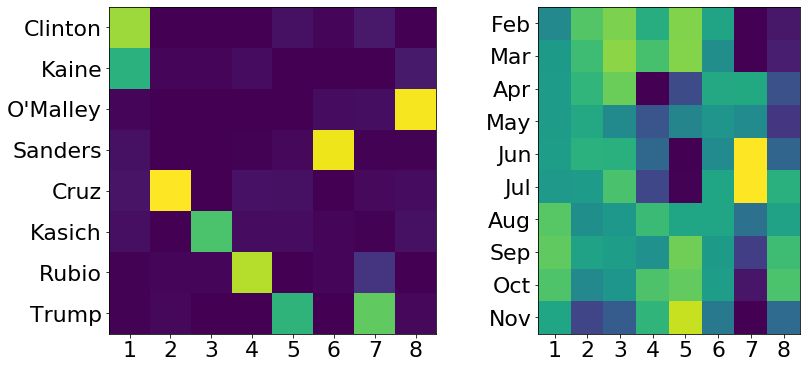

In [50]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(12,5))
color = "viridis"

plt.sca(axs[0])
plt.yticks(range(8), ['Clinton', 'Kaine', 'O\'Malley', 'Sanders', 'Cruz', 'Kasich', 'Rubio', 'Trump'], fontsize=22)
plt.xticks(range(8), range(1,9), fontsize=22)
plt.sca(axs[1])
plt.xticks(range(8), range(1,9), fontsize=22)
plt.yticks(range(10), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], fontsize=22)

axs[0].imshow(X_1, cmap=plt.get_cmap(color))
axs[1].imshow(X_2, cmap=plt.get_cmap(color))
#axs[2].imshow(C_approx, cmap=plt.get_cmap(color))
plt.show()

In [51]:
def calculate_W(A, B, C, H_A, H_B, H_C):
    
    alphas = []
    n_1, r = A.shape
    n_2, r = B.shape
    n_3, r = C.shape
    weights = np.zeros((r, r, 2))
    
    
    for col in range(r):
        for it in range(r**2):
            i = int(it % r)
            j = int((it/r) % r)

            weights[col, i, 0] += np.sum(H_A[i] * H_B[j] * H_C[col]);
            weights[col, j, 1] += np.sum(H_A[i] * H_B[j] * H_C[col]);
         


    return weights

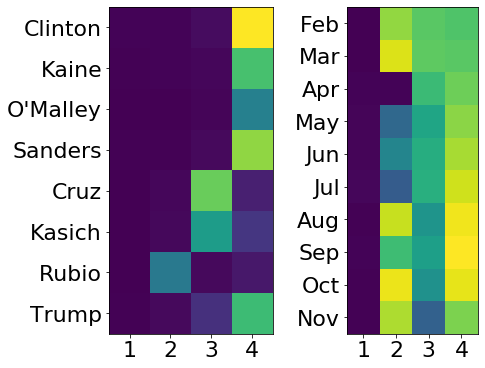

In [58]:
w = calculate_W(A_A1, B_A1, C_A1, A_S1, B_S1, C_S1)

fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(7,5))
color = "viridis"

A_A1_new = A_A1 @ w[:,:,0].T 
B_A1_new = B_A1 @ w[:,:,1].T

plt.sca(axs[0])
plt.xticks(range(4), range(1,5), fontsize=22)
plt.yticks(range(8), ['Clinton', 'Kaine', 'O\'Malley', 'Sanders', 'Cruz', 'Kasich', 'Rubio', 'Trump'], fontsize=22)
plt.sca(axs[1])
plt.xticks(range(4), range(1,5), fontsize=22)
plt.yticks(range(10), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], fontsize=22)

axs[0].imshow(A_A1_new, cmap=plt.get_cmap(color))
axs[1].imshow(B_A1_new, cmap=plt.get_cmap(color))
plt.show()

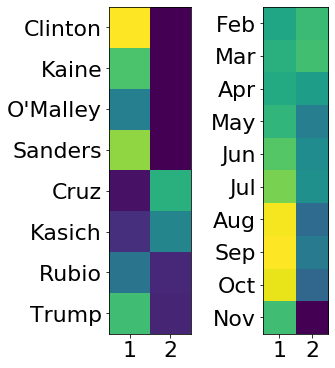

In [53]:
w = calculate_W(np.dot(A_A1,A_A2), np.dot(B_A1,B_A2), np.dot(C_A1,C_A2), A_S2, B_S2, C_S2)

fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(4.8,5))
color = "viridis"

A_new = np.dot(A_A1,A_A2) @ w[:,:,0].T
B_new = np.dot(B_A1,B_A2) @ w[:,:,1].T

plt.sca(axs[0])
plt.xticks(range(2), range(1,3), fontsize=22)
plt.yticks(range(8), ['Clinton', 'Kaine', 'O\'Malley', 'Sanders', 'Cruz', 'Kasich', 'Rubio', 'Trump'], fontsize=22)
plt.sca(axs[1])
plt.xticks(range(2), range(1,3), fontsize=22)
plt.yticks(range(10), ['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], fontsize=22)

axs[0].imshow(A_new, cmap=plt.get_cmap(color))
axs[1].imshow(B_new, cmap=plt.get_cmap(color))
plt.show()

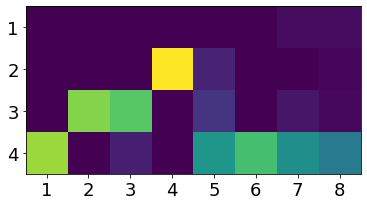

In [54]:
plt.xticks(range(0,8), range(1,9), fontsize=18)
plt.yticks(range(0,4), range(1,5), fontsize=18)

plt.imshow(C_S1)
plt.show()

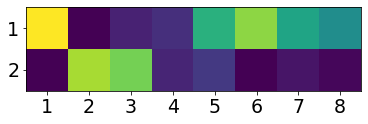

In [55]:

plt.xticks(range(0,8), range(1,9), fontsize=19)
plt.yticks(range(0,2), range(1,3), fontsize=19)

plt.imshow(C_S2)
plt.show()